In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the adjusted dataset
df = pd.read_csv("premier_league_adjusted.csv")

#### Teams consistently overperformed or underperformed based on their xG

In [3]:
# Replace en dash with hyphen in the 'Score' column
df['Score'] = df['Score'].str.replace('–', '-')

# Calculate the total goals scored in each match
df['Home_Score'] = df['Score'].str.split('-').str[0].astype(int)
df['Away_Score'] = df['Score'].str.split('-').str[1].astype(int)

# Calculate the difference between actual goals scored and expected goals for home and away teams
df['Home_Goals_Difference'] = df['Home_Score'] - df['Home_xG']
df['Away_Goals_Difference'] = df['Away_Score'] - df['Away_xG']

# Create a DataFrame for home teams' performance
home_teams_performance = df.groupby('Home_Team')['Home_Goals_Difference'].mean().reset_index()

# Create a DataFrame for away teams' performance
away_teams_performance = df.groupby('Away_Team')['Away_Goals_Difference'].mean().reset_index()

# Merge the two DataFrames to combine home and away performances for each team
team_performance = pd.merge(home_teams_performance, away_teams_performance, left_on='Home_Team', right_on='Away_Team', suffixes=('_Home', '_Away'))

# Calculate the overall performance as the average of home and away performances
team_performance['Overall_Performance'] = (team_performance['Home_Goals_Difference'] + team_performance['Away_Goals_Difference']) / 2

# Identify teams that consistently overperformed or underperformed
overperforming_teams = team_performance[team_performance['Overall_Performance'] > 0]
underperforming_teams = team_performance[team_performance['Overall_Performance'] < 0]

# Sort teams by their overall performance
overperforming_teams = overperforming_teams.sort_values(by='Overall_Performance', ascending=False)
underperforming_teams = underperforming_teams.sort_values(by='Overall_Performance')

# Display the top overperforming and underperforming teams
print("Top Overperforming Teams:")
print(overperforming_teams[['Home_Team', 'Overall_Performance']].head(10))

print("\nTop Underperforming Teams:")
print(underperforming_teams[['Home_Team', 'Overall_Performance']].head(10))

Top Overperforming Teams:
          Home_Team  Overall_Performance
0           Arsenal             0.428947
12  Manchester City             0.402632
17        Tottenham             0.334211
8            Fulham             0.228947
11        Liverpool             0.065789
3         Brentford             0.026316
1       Aston Villa             0.021053
6    Crystal Palace             0.018421
10   Leicester City             0.013158
9      Leeds United             0.013158

Top Underperforming Teams:
          Home_Team  Overall_Performance
5           Chelsea            -0.305263
7           Everton            -0.297368
13   Manchester Utd            -0.250000
18         West Ham            -0.189474
19           Wolves            -0.160526
14    Newcastle Utd            -0.107895
16      Southampton            -0.050000
15  Nott'ham Forest            -0.039474
2       Bournemouth            -0.034211
4          Brighton            -0.034211


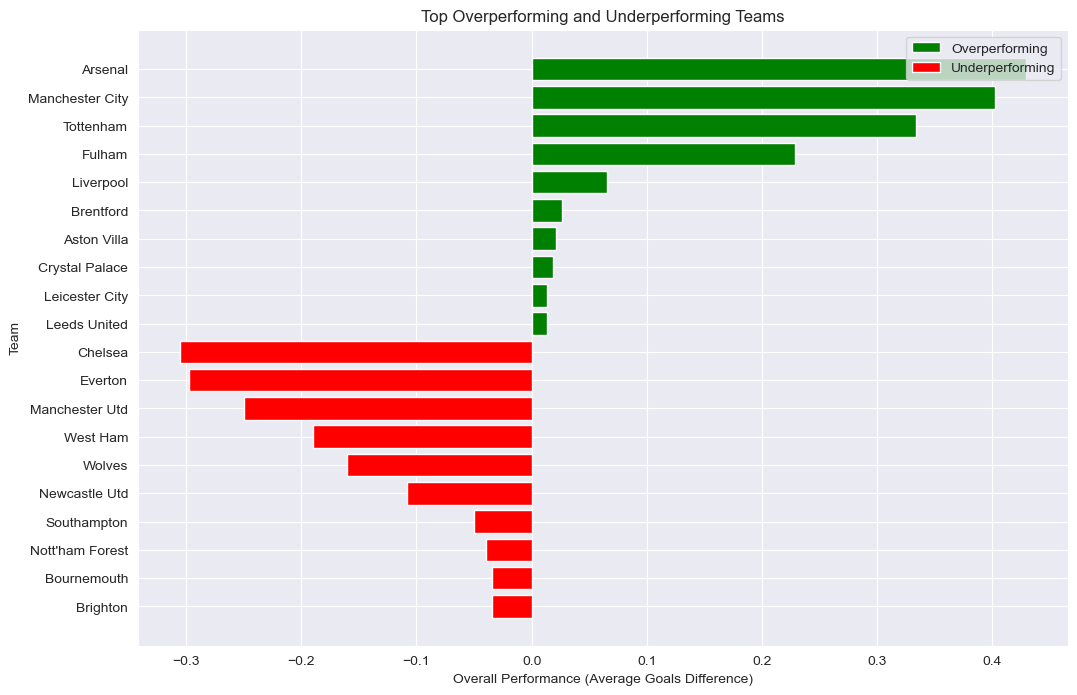

In [4]:
# Visualize the top overperforming and underperforming teams
plt.figure(figsize=(12, 8))
plt.barh(overperforming_teams['Home_Team'].head(10), overperforming_teams['Overall_Performance'].head(10), color='green', label='Overperforming')
plt.barh(underperforming_teams['Home_Team'].head(10), underperforming_teams['Overall_Performance'].head(10), color='red', label='Underperforming')
plt.title('Top Overperforming and Underperforming Teams')
plt.xlabel('Overall Performance (Average Goals Difference)')
plt.ylabel('Team')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.show()

#### Teams known for late comebacks or early leads

In [32]:
# Replace en dash with hyphen in the 'Score' column
df['Score'] = df['Score'].str.replace('–', '-')

# Calculate the total goals scored in each match
df['Home_Score'] = df['Score'].str.split('-').str[0].astype(int)
df['Away_Score'] = df['Score'].str.split('-').str[1].astype(int)

# Create a function to determine if a goal was scored in the first half or second half
def goal_timing(row):
    if row['Home_Score'] + row['Away_Score'] == 0:
        return 'No Goals'
    elif row['Home_Score'] + row['Away_Score'] >= 3:
        return 'Early Lead'
    elif row['Home_Score'] + row['Away_Score'] >= 1:
        return 'Late Comeback'
    else:
        return 'Other'

df['Goal_Timing'] = df.apply(goal_timing, axis=1)

# Group the data by home teams and calculate the percentage of matches with early leads or late comebacks
home_team_stats = df.groupby('Home_Team')['Goal_Timing'].value_counts(normalize=True).unstack().fillna(0)
home_team_stats['Early_Lead_Percentage'] = home_team_stats['Early Lead'] * 100
home_team_stats['Late_Comeback_Percentage'] = home_team_stats['Late Comeback'] * 100

# Group the data by away teams and calculate the percentage of matches with early leads or late comebacks
away_team_stats = df.groupby('Away_Team')['Goal_Timing'].value_counts(normalize=True).unstack().fillna(0)
away_team_stats['Early_Lead_Percentage'] = away_team_stats['Early Lead'] * 100
away_team_stats['Late_Comeback_Percentage'] = away_team_stats['Late Comeback'] * 100

# Identify teams known for early leads or late comebacks
teams_known_for_early_leads = home_team_stats[home_team_stats['Early_Lead_Percentage'] > 50].index.tolist()
teams_known_for_late_comebacks = away_team_stats[away_team_stats['Late_Comeback_Percentage'] > 50].index.tolist()

print("Teams Known for Early Leads:")
print(teams_known_for_early_leads)

print("\nTeams Known for Late Comebacks:")
print(teams_known_for_late_comebacks)

Teams Known for Early Leads:
['Arsenal', 'Aston Villa', 'Brighton', 'Fulham', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd', 'Tottenham']

Teams Known for Late Comebacks:
['Arsenal', 'Aston Villa', 'Bournemouth', 'Crystal Palace', 'Manchester City', 'Manchester Utd', 'West Ham']


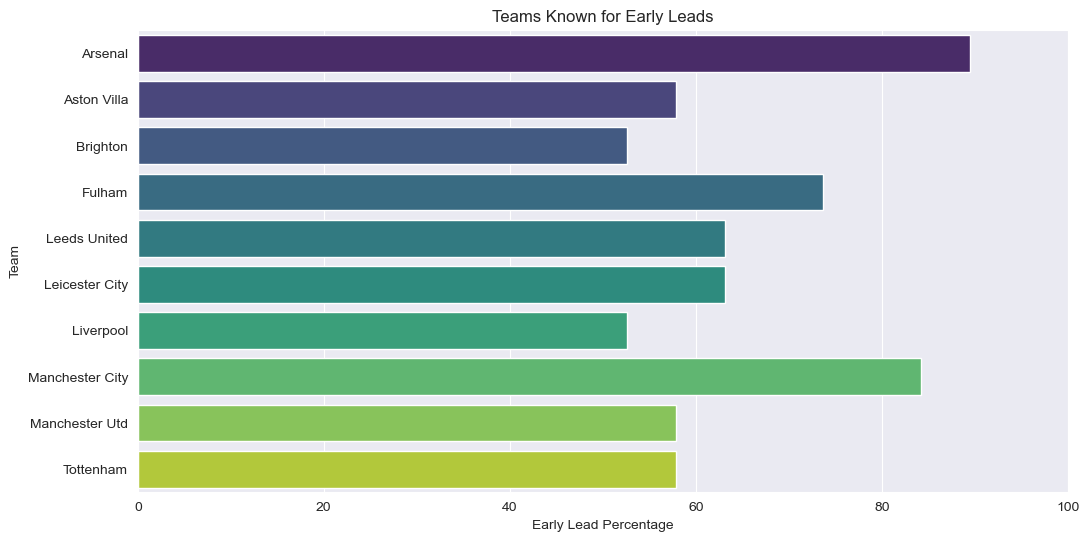

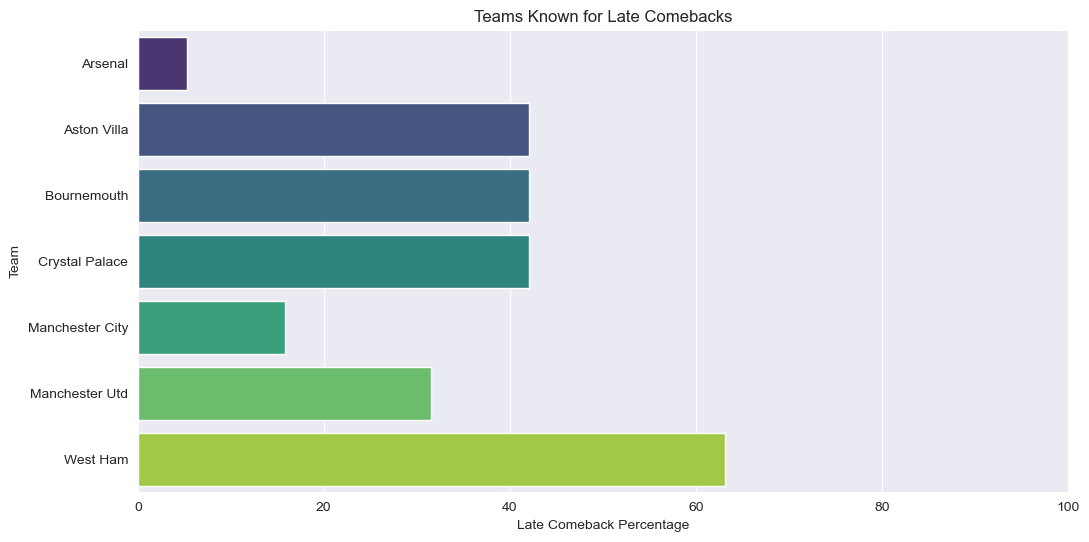

In [33]:
# Check if there is sufficient data for the bar plots
if len(teams_known_for_early_leads) > 0:
    # Create a bar plot to visualize teams known for early leads
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='Early_Lead_Percentage',
        y='Home_Team',
        data=home_team_stats.reset_index(),
        palette='viridis',
        order=teams_known_for_early_leads)
    plt.title('Teams Known for Early Leads')
    plt.xlabel('Early Lead Percentage')
    plt.ylabel('Team')
    plt.xlim(0, 100)
    plt.show()

if len(teams_known_for_late_comebacks) > 0:
    # Create a bar plot to visualize teams known for late comebacks
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='Late_Comeback_Percentage',
        y='Home_Team',
        data=home_team_stats.reset_index(),
        palette='viridis',
        order=teams_known_for_late_comebacks)
    plt.title('Teams Known for Late Comebacks')
    plt.xlabel('Late Comeback Percentage')
    plt.ylabel('Team')
    plt.xlim(0, 100)
    plt.show()